Percentage accepted total 0.57
Accepted by prompt
prompt_id
legal-sentence-level-cot-with-search-v1    28
legal-sentence-level-cot-with-search-v2    36
multiple-paragraphs                        25
sentence-level-cot                         27
sentence-level-cot-with-search             32
single-paragraph                           23
dtype: int64
prompt_id
legal-sentence-level-cot-with-search-v1    0.56
legal-sentence-level-cot-with-search-v2    0.72
multiple-paragraphs                        0.50
sentence-level-cot                         0.54
sentence-level-cot-with-search             0.64
single-paragraph                           0.46
dtype: float64


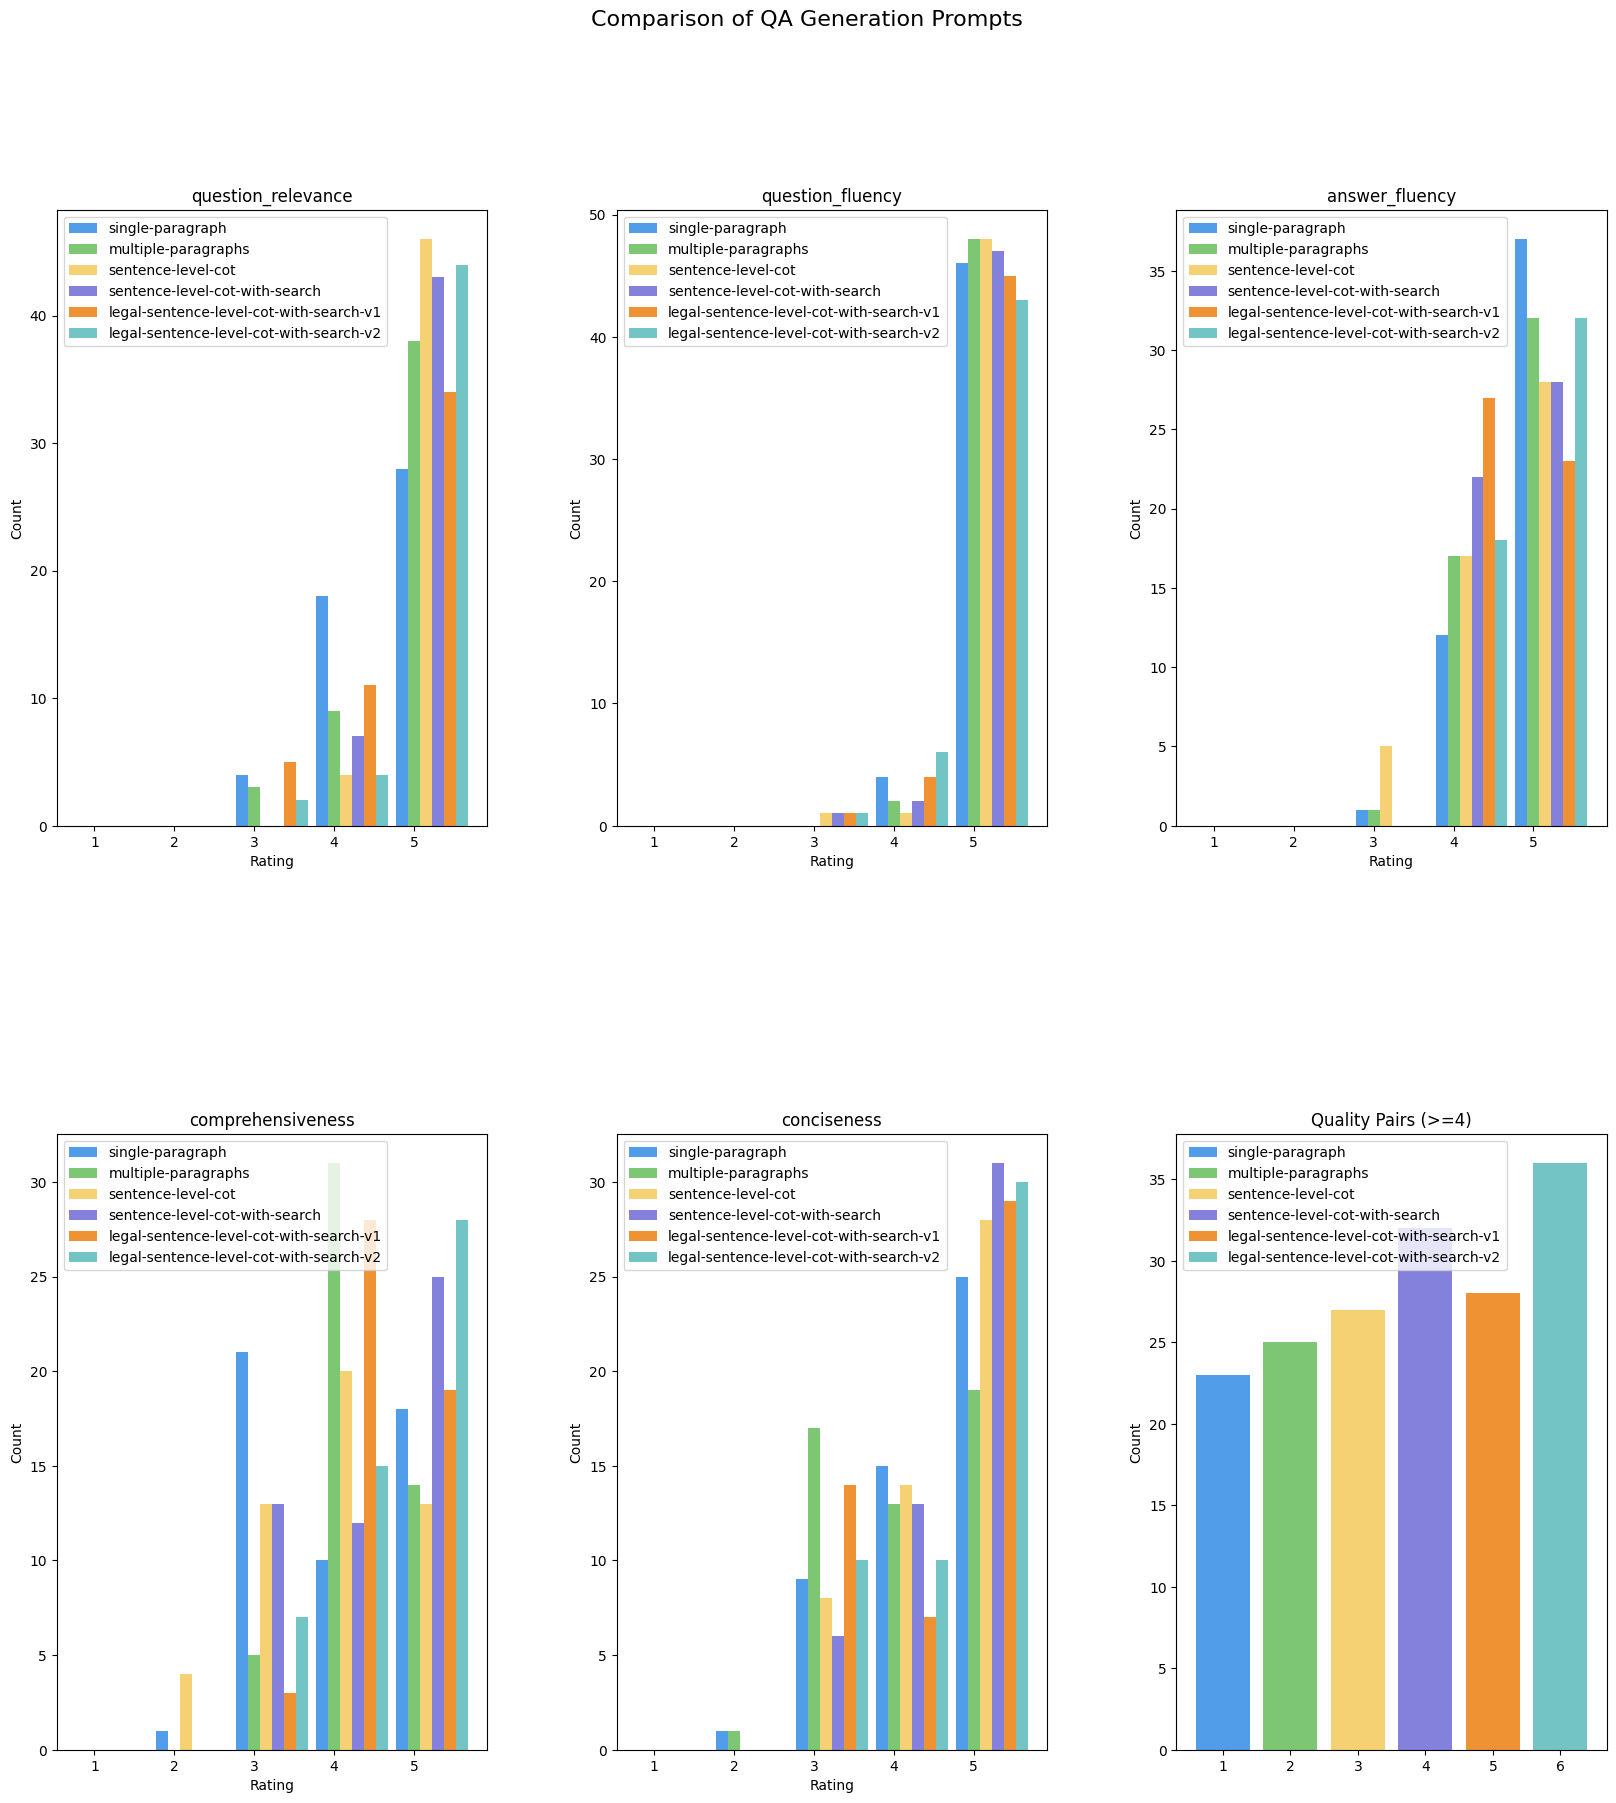

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

df = pd.read_csv('data/annotated_qa_pairs_with_llm_annotations.csv')

order = ["single-paragraph", "multiple-paragraphs", "sentence-level-cot", "sentence-level-cot-with-search", "legal-sentence-level-cot-with-search-v1", "legal-sentence-level-cot-with-search-v2"]

df = df.sort_values(by='prompt_id', key=lambda x: x.map({v: i for i, v in enumerate(order)}))

prompt_ids = df['prompt_id'].unique()

dfs = [df[df['prompt_id'] == prompt] for prompt in prompt_ids]

color_scheme = ["#519DE9", "#7CC674", "#F6D173", "#8481DD", "#EF9234", "#73C5C5"]
    
categories = ['question_relevance', 'question_fluency', 'answer_fluency', 'comprehensiveness', 'conciseness']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Comparison of QA Generation Prompts', fontsize=16)

for i, category in enumerate(categories):
    ax = axes.flatten()[i]
    indices = np.arange(5)
    width = 0.15

    def to_values(df, category):
        d = {1: 0, 2:0, 3:0, 4:0, 5:0}
        for k, v in df[category].value_counts().sort_index().to_dict().items():
            d[k] = v
        return d.values()

    for j, prompt_id in enumerate(prompt_ids):
        ax.bar(indices + width * j, to_values(dfs[j], category), width=width, label=prompt_id, color=color_scheme[j % len(color_scheme)])
    
    ax.set_title(category)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticks(indices + width)
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    ax.legend()

# accept all in the df that have a rating of >= 4
accepted = df[(df['question_relevance'] >= 4) & (df['question_fluency'] >= 4) & (df['answer_fluency'] >= 4) & (df['comprehensiveness'] >= 4) & (df['conciseness'] >= 4)]
# accepted = df[(df['comprehensiveness'] >= 4) & (df['conciseness'] >= 4)]

accepted_by_prompt = accepted.groupby('prompt_id').size()
total_by_prompt = df.groupby('prompt_id').size()

# size of accepted divided by size of all
print("Percentage accepted total", accepted.size / df.size)
print("Accepted by prompt")
print(accepted_by_prompt)
print(accepted_by_prompt / total_by_prompt)

# sort accepted_by_prompt by order
accepted_by_prompt = accepted_by_prompt[order]

# transform accepted_by_prompt to a list
accepted_by_prompt = accepted_by_prompt.to_dict().values()

ax = axes.flatten()[-1]

bars = ax.bar(['1', '2', '3', '4', '5', '6'], accepted_by_prompt, color=color_scheme)

# Add labels to the bars
for bar, prompt_id in zip(bars, order):
    bar.set_label(prompt_id)

ax.set_title('Quality Pairs (>=4)')
ax.set_ylabel('Count')
ax.legend()

In [6]:
df = pd.read_csv('data/annotated_qa_pairs_with_llm_annotations.csv')

order = ["single-paragraph", "multiple-paragraphs", "sentence-level-cot", "sentence-level-cot-with-search", "legal-sentence-level-cot-with-search-v1", "legal-sentence-level-cot-with-search-v2"]

df_single_paragraph = df[df['prompt_id'] == 'single-paragraph']
df_multiple_paragraphs = df[df['prompt_id'] == 'multiple-paragraphs']
df_sentence_level_cot = df[df['prompt_id'] == 'sentence-level-cot']
df_sentence_level_cot_with_search = df[df['prompt_id'] == 'sentence-level-cot-with-search']
df_legal_sentence_level_cot_with_search_v1 = df[df['prompt_id'] == 'legal-sentence-level-cot-with-search-v1']
df_legal_sentence_level_cot_with_search_v2 = df[df['prompt_id'] == 'legal-sentence-level-cot-with-search-v2']
print("prompt | Question Relevance | Question Fluency | Answer Fluency | Comprehensiveness | Conciseness ")
print(f"single-paragraph | {df_single_paragraph['question_relevance'].mean()} | {df_single_paragraph['question_fluency'].mean()} | {df_single_paragraph['answer_fluency'].mean()} | {df_single_paragraph['comprehensiveness'].mean()} | {df_single_paragraph['conciseness'].mean()}")
print(f"multiple-paragraphs | {df_multiple_paragraphs['question_relevance'].mean()} | {df_multiple_paragraphs['question_fluency'].mean()} | {df_multiple_paragraphs['answer_fluency'].mean()} | {df_multiple_paragraphs['comprehensiveness'].mean()} | {df_multiple_paragraphs['conciseness'].mean()}")
print(f"sentence-level-cot | {df_sentence_level_cot['question_relevance'].mean()} | {df_sentence_level_cot['question_fluency'].mean()} | {df_sentence_level_cot['answer_fluency'].mean()} | {df_sentence_level_cot['comprehensiveness'].mean()} | {df_sentence_level_cot['conciseness'].mean()}")
print(f"sentence-level-cot-with-search | {df_sentence_level_cot_with_search['question_relevance'].mean()} | {df_sentence_level_cot_with_search['question_fluency'].mean()} | {df_sentence_level_cot_with_search['answer_fluency'].mean()} | {df_sentence_level_cot_with_search['comprehensiveness'].mean()} | {df_sentence_level_cot_with_search['conciseness'].mean()}")
print(f"legal-sentence-level-cot-with-search-v1 | {df_legal_sentence_level_cot_with_search_v1['question_relevance'].mean()} | {df_legal_sentence_level_cot_with_search_v1['question_fluency'].mean()} | {df_legal_sentence_level_cot_with_search_v1['answer_fluency'].mean()} | {df_legal_sentence_level_cot_with_search_v1['comprehensiveness'].mean()} | {df_legal_sentence_level_cot_with_search_v1['conciseness'].mean()}")
print(f"legal-sentence-level-cot-with-search-v2 | {df_legal_sentence_level_cot_with_search_v2['question_relevance'].mean()} | {df_legal_sentence_level_cot_with_search_v2['question_fluency'].mean()} | {df_legal_sentence_level_cot_with_search_v2['answer_fluency'].mean()} | {df_legal_sentence_level_cot_with_search_v2['comprehensiveness'].mean()} | {df_legal_sentence_level_cot_with_search_v2['conciseness'].mean()}")


prompt | Question Relevance | Question Fluency | Answer Fluency | Comprehensiveness | Conciseness 
single-paragraph | 4.48 | 4.92 | 4.72 | 3.9 | 4.28
multiple-paragraphs | 4.7 | 4.96 | 4.62 | 4.18 | 4.0
sentence-level-cot | 4.92 | 4.94 | 4.46 | 3.84 | 4.4
sentence-level-cot-with-search | 4.86 | 4.92 | 4.56 | 4.24 | 4.5
legal-sentence-level-cot-with-search-v1 | 4.58 | 4.88 | 4.46 | 4.32 | 4.3
legal-sentence-level-cot-with-search-v2 | 4.84 | 4.84 | 4.64 | 4.42 | 4.4
